In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


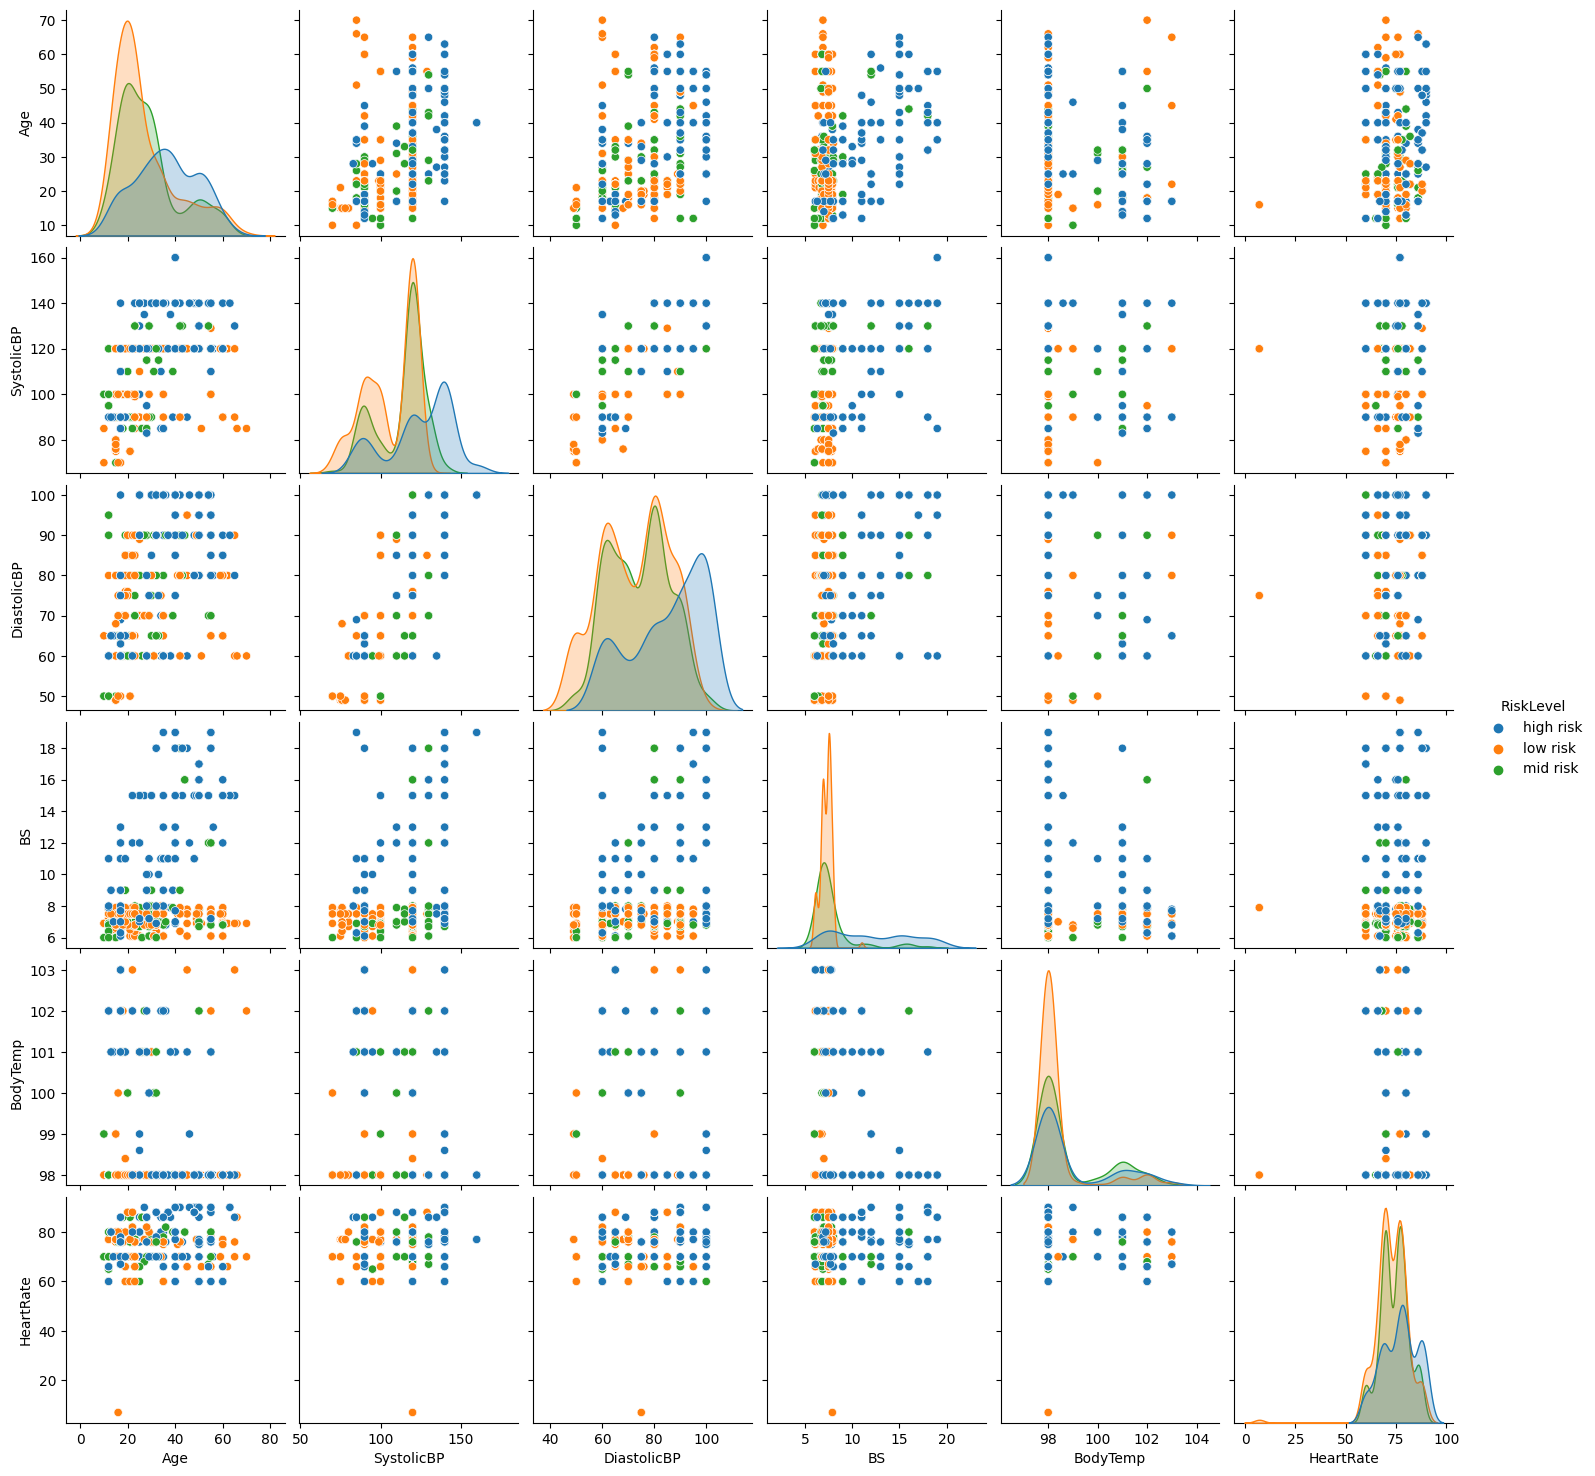

In [ ]:
sns.pairplot(df, hue = 'RiskLevel')

In [ ]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

#Feature Selection

In [ ]:
y = df['RiskLevel']

X = df.drop(['RiskLevel'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 3, max_depth = 2, random_state= 42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array(['low risk', 'high risk', 'high risk', 'low risk', 'mid risk',
       'mid risk', 'low risk', 'high risk', 'low risk', 'mid risk',
       'high risk', 'low risk', 'low risk', 'mid risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'mid risk', 'low risk', 'high risk', 'mid risk',
       'low risk', 'high risk', 'low risk', 'low risk', 'low risk',
       'mid risk', 'high risk', 'low risk', 'low risk', 'low risk',
       'high risk', 'high risk', 'low risk', 'low risk', 'high risk',
       'high risk', 'mid risk', 'high risk', 'low risk', 'low risk',
       'mid risk', 'high risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'mid risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'low risk', 'low risk',
       'high risk', 'high risk', 'low risk', 'low risk', 'mid risk',
       'low risk', 'high risk', 'low risk', 'mi

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


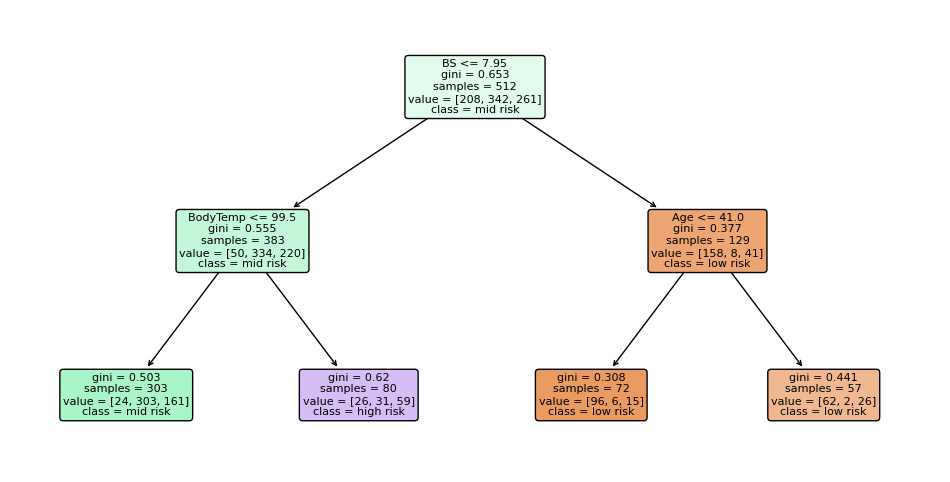

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


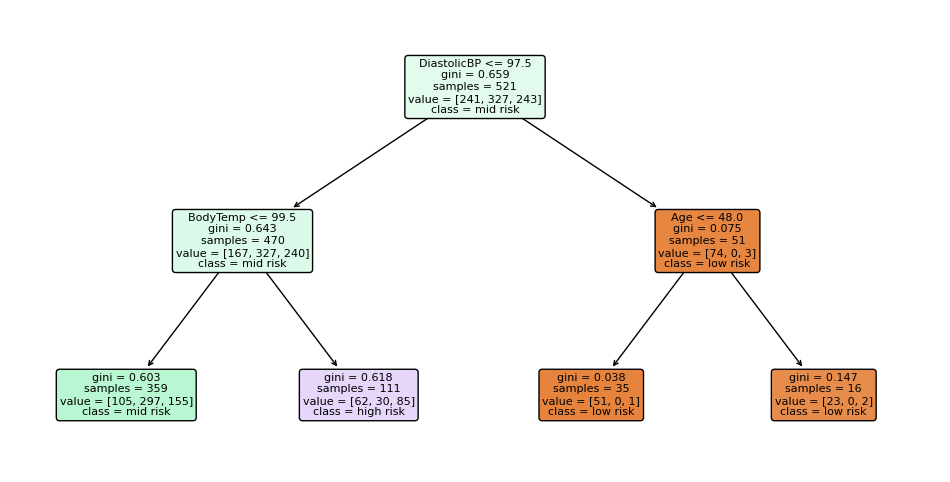

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


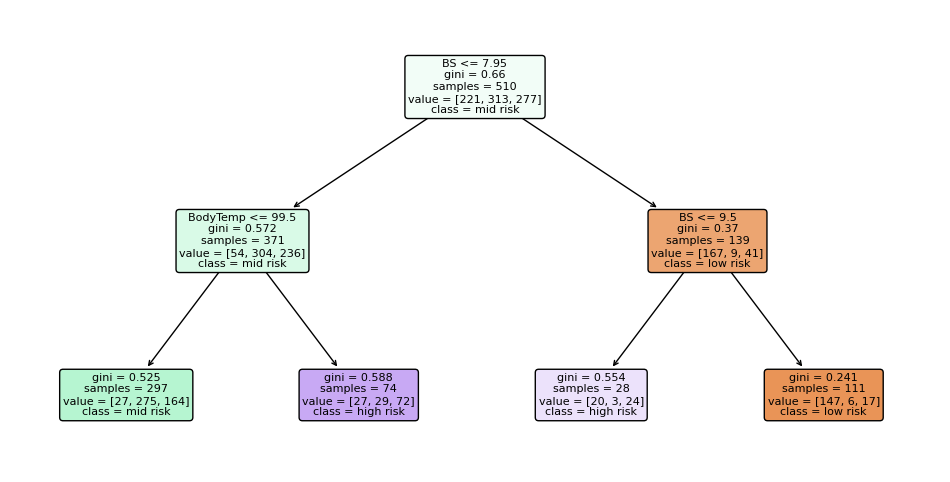

In [ ]:
from sklearn import tree
features = X.columns.values 
classes = ['low risk','mid risk','high risk']

for estimator in rf.estimators_:
  print(estimator)
  plt.figure(figsize=(12,6))
  tree.plot_tree(estimator,
                 feature_names = features,
                 class_names = classes,
                 fontsize = 8,
                 filled = True,
                 rounded = True)
  plt.show()

              precision    recall  f1-score   support

   high risk       0.74      0.72      0.73        47
    low risk       0.53      0.89      0.66        80
    mid risk       0.57      0.17      0.26        76

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



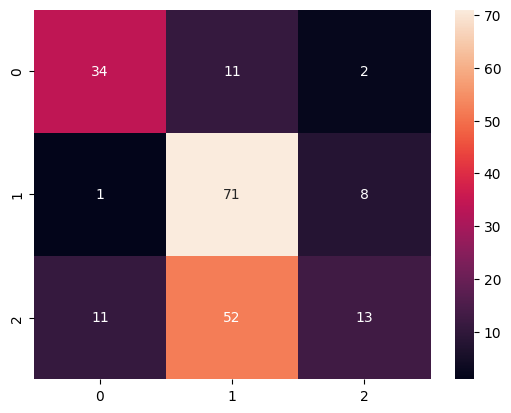

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 3000, max_depth = 100, random_state= 1001)

rf1.fit(X_train,y_train)
y_pred = rf1.predict(X_test)

              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.75      0.80        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203



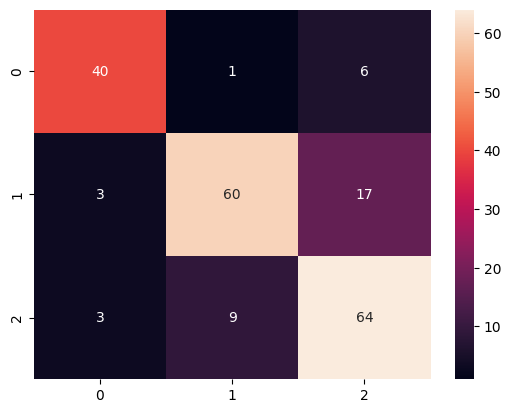

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot = True)

print(classification_report(y_test,y_pred))

#Random forest Regressor

In [ ]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
from sklearn.model_selection import train_test_split

y = df['BS']
X = df.drop(['BS'], axis = 1)
X = df.drop(['RiskLevel'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20,
                            max_depth = 3,
                            random_state = 42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

[Text(0.5, 0.875, 'BS <= 12.5\nsquared_error = 11.23\nsamples = 512\nvalue = 8.757'),
 Text(0.25, 0.625, 'BS <= 9.5\nsquared_error = 1.656\nsamples = 447\nvalue = 7.589'),
 Text(0.125, 0.375, 'BS <= 7.35\nsquared_error = 0.362\nsamples = 408\nvalue = 7.223'),
 Text(0.0625, 0.125, 'squared_error = 0.102\nsamples = 222\nvalue = 6.757'),
 Text(0.1875, 0.125, 'squared_error = 0.137\nsamples = 186\nvalue = 7.745'),
 Text(0.375, 0.375, 'BS <= 11.5\nsquared_error = 0.25\nsamples = 39\nvalue = 11.152'),
 Text(0.3125, 0.125, 'squared_error = 0.071\nsamples = 29\nvalue = 10.923'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 10\nvalue = 12.0'),
 Text(0.75, 0.625, 'BS <= 16.5\nsquared_error = 3.197\nsamples = 65\nvalue = 16.786'),
 Text(0.625, 0.375, 'BS <= 14.0\nsquared_error = 0.554\nsamples = 35\nvalue = 15.08'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 13.0'),
 Text(0.6875, 0.125, 'squared_error = 0.193\nsamples = 33\nvalue = 15.261'),
 Text(0.875, 0.375, 'BS <=

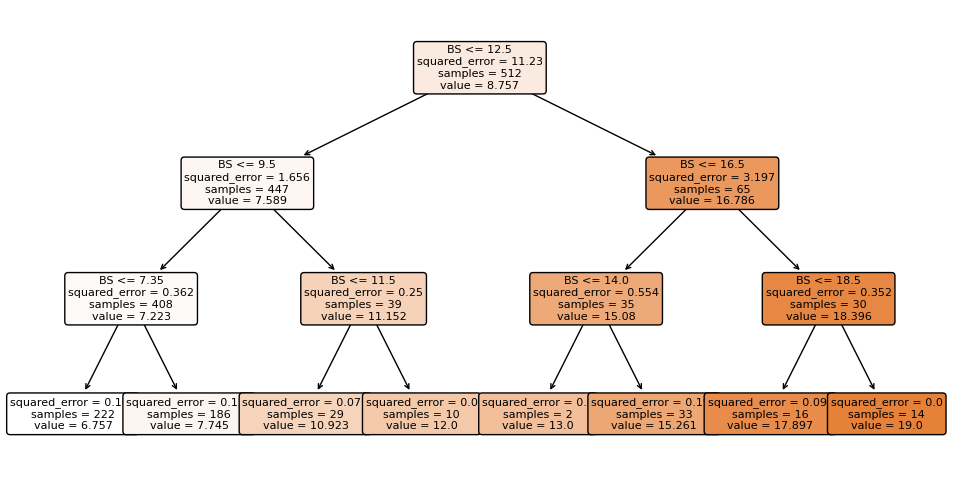

In [ ]:
from sklearn import tree
features = X.columns
first_tree = rfr.estimators_[0]
plt.figure(figsize=(12,6))
tree.plot_tree(first_tree,
                 feature_names = features,
                 fontsize = 8,
                 filled = True,
                 rounded = True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("The Mean squared error is", mean_squared_error(y_test,y_pred))
print("The Mean absolute error is", mean_absolute_error(y_test,y_pred))
print("The Root Mean squared error is", np.sqrt(mean_squared_error(y_test, y_pred)))

The Mean squared error is 0.07032257179165204
The Mean absolute error is 0.20486783035246262
The Root Mean squared error is 0.26518403381737
